In [1]:
# Import modules.
import torch
import random

import numpy as np

from trainer import Trainer
from torch import nn, optim
from hyperparameters import *
from torchsummary import summary
from torch.utils.data import DataLoader
from network import Discriminator, Generator
from torchvision import datasets, transforms

c:\Users\User\anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 指定されたプロシージャが見つかりません。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# Set training device.
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
else:
    device = torch.device("cpu")
    print("CUDA is not available, using CPU instead.")

CUDA is available.


In [3]:
# Set random seed.
random_seed = 0

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [4]:
# Set data transform.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [5]:
# Get dataset.
train_data = datasets.MNIST(
    root=DATASET_PATH,
    train=True,
    download=True,
    transform=transform,
)

# Create data loader.
train_loader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [6]:
# Set model.
D_MODEL = Discriminator()
G_MODEL = Generator(z_dim=Z_SHAPE[0])

D_MODEL.to(device=device)
G_MODEL.to(device=device)

Generator(
  (block1): Sequential(
    (0): ConvTranspose2d(100, 256, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (block2): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (block3): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv1): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(3, 3), bias=False)
  (embedding): Embedding(10, 100)
  (tanh): Tanh()
)

In [7]:
# # Print model summary.
# print("Discriminator model summary:")
# summary(D_MODEL, input_size=(1, 64, 64))
# print()

# print("Generator model summary:")
# summary(G_MODEL, input_size=Z_SHAPE)
# print()

In [8]:
# Set optimizer and loss function.
d_optimizer = optim.Adam(D_MODEL.parameters(), lr=LEARNING_RATE, betas=(BETA1, BETA2))
g_optimier = optim.Adam(G_MODEL.parameters(), lr=LEARNING_RATE, betas=(BETA1, BETA2))

d_loss_fn = nn.BCELoss()
g_loss_fn = nn.BCELoss()

c:\Users\User\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\Convolution.cpp:896.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch: 0 | Time: 311.532 | D Loss: 0.531 | G Loss: 1.820                              


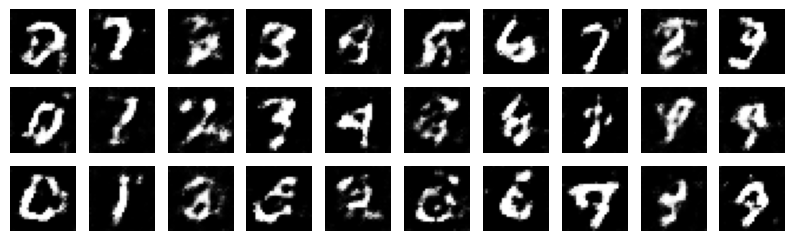

Epoch: 1 | Time: 305.036 | D Loss: 0.703 | G Loss: 1.614                              


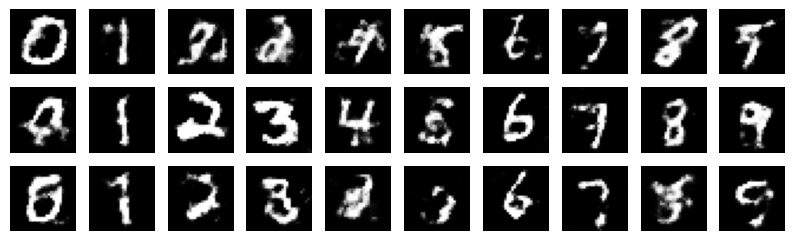

In [9]:
trainer = Trainer(data_loader=train_loader, batch_size=BATCH_SIZE, d_model=D_MODEL, g_model=G_MODEL, d_optimizer=d_optimizer, g_optimizer=g_optimier, d_loss_fn=d_loss_fn, g_loss_fn=g_loss_fn, device=device, z_shape=Z_SHAPE)
trainer.train(epochs=2, dg_ratio=2, test=True, test_num=30)

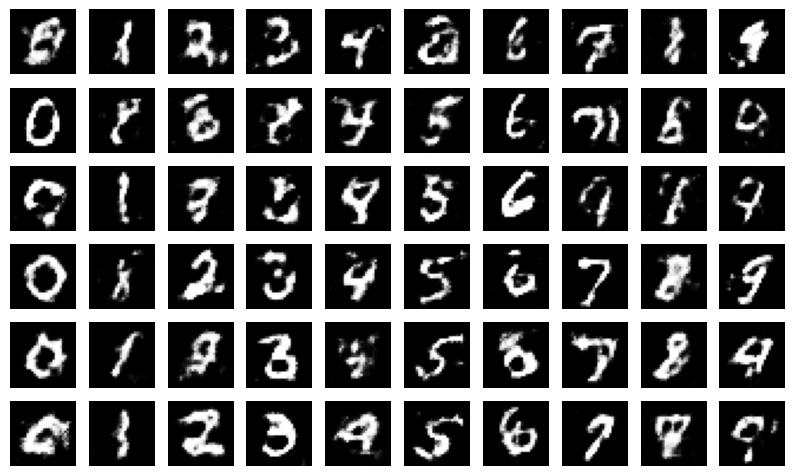

In [10]:
trainer.test(num=60)